# ORIE 4580: Buffon's Needle simulation
#### *Sid Banerjee, Cornell*



Notebook demonstrating Buffon's needle simulation, and introducing basic animation techniques in python. 

See [Wikipedia article](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem) for details of the problem.



## Preamble to make sure we have all packages we need

In [1]:
import numpy as np
import scipy as sc
import math

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

# Configuring seaborn
# import seaborn as sns
# sns.set_style("darkgrid")
# sns.set_context("talk",font_scale=1.5, rc={"lines.linewidth": 2.5})

# Buffon's needle simulation

Main simulation function, and generating the data

In [2]:
def buffon(N,length,dist,num_lines = 2,seed=-1):
    """
    Generates a design matrix with Gaussian basis functions
    
    Parameters
    ----------
    N: number of throws 
    length: length of toothpick
    dist: distance between lines
    num_lines: number of lines (should be >=2)
    seed: seed for random number generator; -1 for no seed
        
    Returns
    ----------
    sim_data: list of length N with outputs of sims
              each simulation output comprises:
              (tuples) (x_1,y_1), (x_2,y_2) of toothpick endpoints
              (int) number of line crossings
    
    """

    # Setting seed for PRNG (using -1 for no seed)
    if seed!=-1:
      np.random.seed(seed)              

    # Generate random centers and angles of toothpicks    
    # np.random.rand() generates a U[0,1] random variable
    xcent = 1+(num_lines-1)*np.random.rand(N)
    ycent = 1+(num_lines-1)*np.random.rand(N)
    theta = (np.pi/2.0)*np.random.rand(N)
    
    # Count number of times each toothpick touches a line
    crossed = (ycent - np.floor(ycent) - (length/2.0)*np.sin(theta) < 0).astype(int) + (ycent - np.floor(ycent) + (length/2.0)*np.sin(theta) > dist).astype(int)

    # Return toothpick endpoints, number of times each toothpick crosses    
    sim_data  = list(zip(list(zip(xcent - (length/2.0)*np.cos(theta),ycent - (length/2.0)*np.sin(theta))),
                     list(zip(xcent + (length/2.0)*np.cos(theta),ycent + (length/2.0)*np.sin(theta))),
                     crossed))

    return sim_data

In [3]:
# Generating the simulation data
N = 200
num_lines = 5
length = 1
dist = 1
data = buffon(N,length,dist,num_lines,seed=1)
crossed = np.cumsum([data[i][2] for i in range(N)])

## Static plots of simulation data

In [4]:
# For displaying static plots, matplotlib inline mode works better
%matplotlib inline

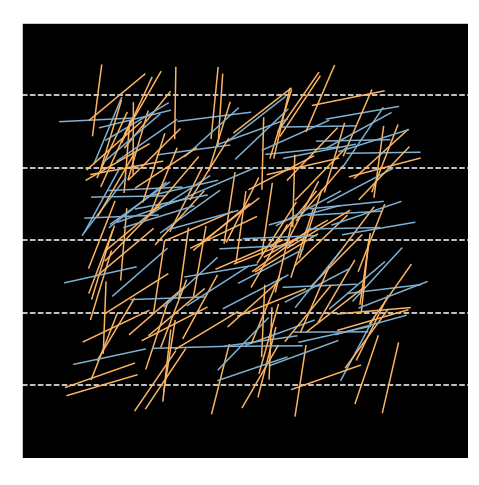

In [5]:
from matplotlib.collections import LineCollection

lines = []
colors = []
for i in range(N):
  lines.append([(data[i][0][0],data[i][0][1]),(data[i][1][0],data[i][1][1])])
  colors.append(cmap(data[i][2]+4))
  
fig, ax = plt.subplots(figsize=(8,8))
ax.set(xlim=(0,num_lines+1), ylim=(0,num_lines+1))
ax.hlines(np.arange(1,num_lines+1), 0, num_lines+1, colors='white', linestyles='dashed')
ax.set_title('Buffon\'s needle simulation')

from matplotlib.collections import LineCollection

line_segments = LineCollection(lines,colors=colors)
ax.add_collection(line_segments)

plt.show()

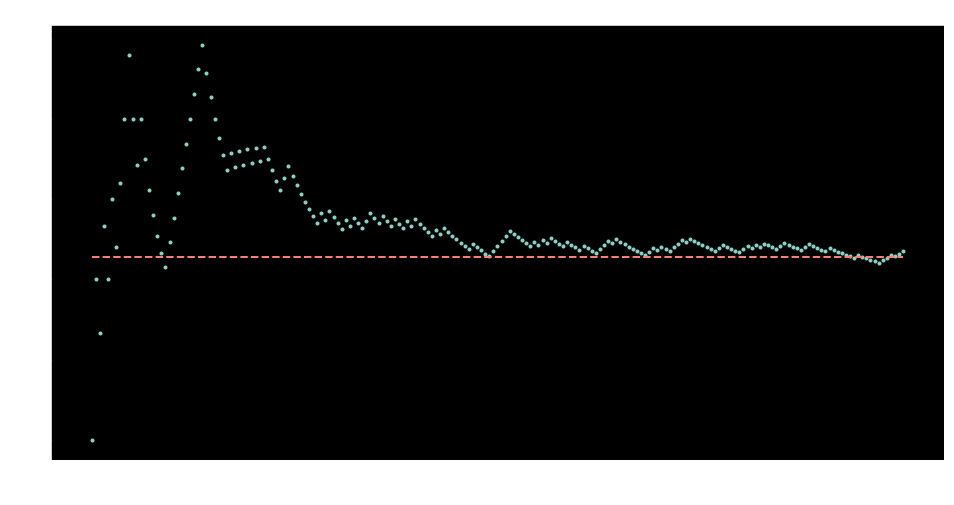

In [6]:
offset = 1   
n = np.arange(1,N+1)    
estim = np.zeros(N)
for i in n:
    estim[i-1] = 2.0*i/max(1,crossed[i-1])
    
fig, ax = plt.subplots(figsize=(16,8))
    
ax.plot(n[offset:],estim[offset:],'.',c=cmap(0))
ax.plot(n[offset:],np.pi*np.ones(len(n[offset:])),'--',c=cmap(3),lw=2)
ax.set_xlabel('Number of throws')
ax.set_ylabel('Estimate')
ax.set_title('Estimating $\pi$ via Buffon\'s Needle Experiment')
plt.show()

## Animated plots of simulation data

One way to do matplotlib animations is using the FuncAnimation function (see [docs](https://matplotlib.org/3.3.1/api/animation_api.html)). 

This requires using matplotlib in the interactive mode (see [blog post](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1))

In [7]:
# displaying animation works better with matplotlib in interactive mode
%matplotlib notebook

<IPython.core.display.Javascript object>


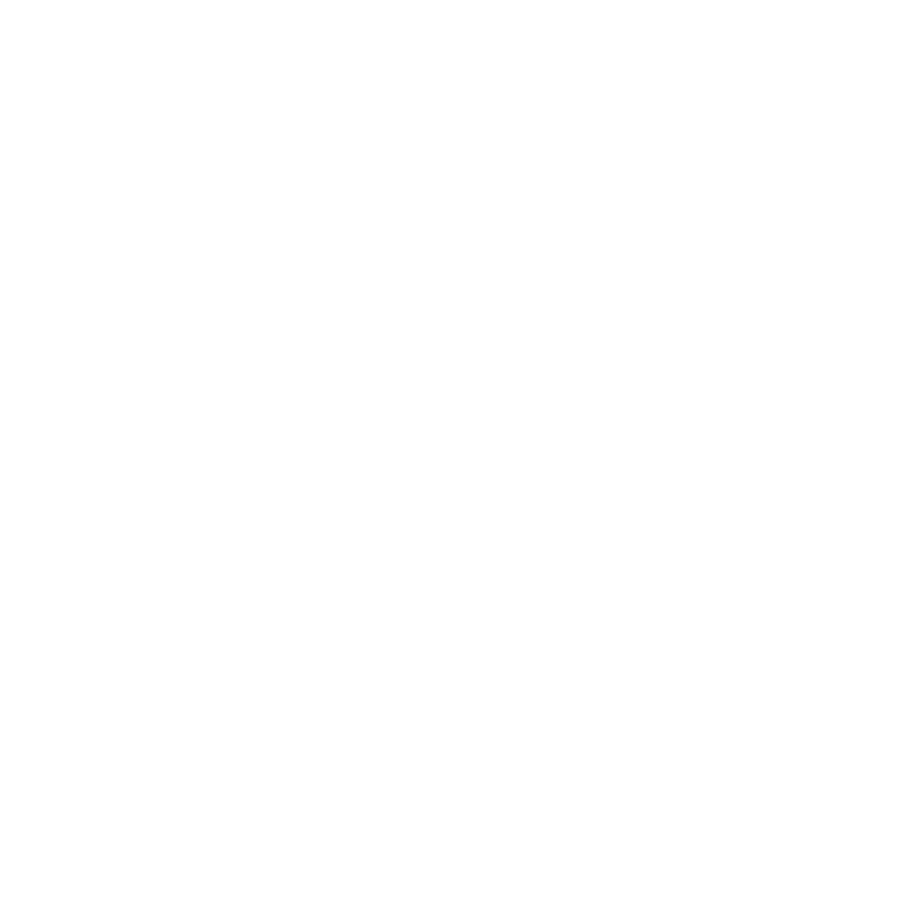

<IPython.core.display.Javascript object>


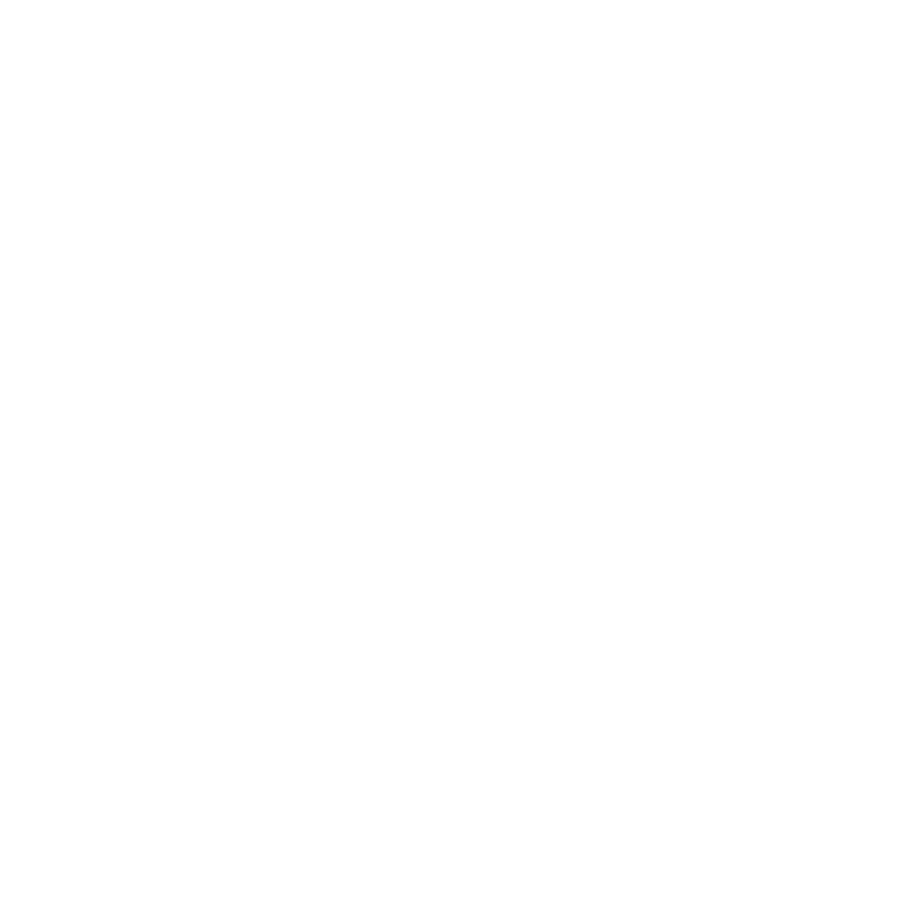

In [9]:
# Create animation using matplotlib.animation 

# The following command suppresses outputs of cell
# We use it here to avoid displaying blank figure
#%%capture


from IPython.display import HTML
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,8))
ax.set(xlim=(0,num_lines+1), ylim=(0,num_lines+1))
ax.hlines(np.arange(1,num_lines+1), 0, num_lines+1, colors='green', linestyles='dashed')

disp_template = 'throws = %i\ncrossed = %i'
disp_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def animate(i):
    line = ax.plot((data[i][0][0],data[i][1][0]),(data[i][0][1],data[i][1][1]),c=cmap(data[i][2]+4),lw=2)  
    disp_text.set_text(disp_template % (i+1,crossed[i]))
    return line, disp_text

# First way to display animation. Need to use 'jshtml' for Google Colab, 'html5' for localhost
plt.rc('animation', html='html5')
ani = FuncAnimation(fig, animate, N, interval=200, blit=True)

In [10]:
# Now we can display the animation
ani

More complex animation with mupltiple subplots

In [11]:
%%capture
# If animation is too big, may need to increase embed limit
#plt.rcParams['animation.embed_limit'] = 2**128

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,7))

ax1.set_title('Buffon\'s needle simulation')
ax1.set(xlim=(0,num_lines+1), ylim=(0,num_lines+1))
ax1.hlines(np.arange(1,num_lines+1), 0, num_lines+1, colors='white', linestyles='dashed')

n = np.arange(N)
cr_min = np.min([2.0*(n[i]+1)/max(1.0,crossed[i]) for i in range(N)])
cr_max = np.max([2.0*(n[i]+1)/max(1.0,crossed[i]) for i in range(N)])
ax2.set_title('Estimate for $\pi$')
ax2.set(xlim=(0,N+1), ylim=(cr_min,cr_max))
ax2.hlines(np.pi, 0, N+1, colors=cmap(3), linestyles='dashed')
ax2.set_xlabel('Number of throws')
ax2.set_ylabel('Estimate')

disp_template = 'throws = %i\ncrossed = %i'
disp_text = ax1.text(0.05, 0.9, '', transform=ax1.transAxes)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2)
line = [line1, line2]

def animate(i):
    line[0] = ax1.plot((data[i][0][0],data[i][1][0]),(data[i][0][1],data[i][1][1]),c=cmap(data[i][2]+4))  
    line[1] = ax2.plot(i+1,2.0*(i+1)/max(1,crossed[i]),'o',c=cmap(1))
    disp_text.set_text(disp_template % (i+1,crossed[i]))
    return line, disp_text

ani = FuncAnimation(fig, animate, N, interval=100, blit=True)

In [12]:
# Alternate way for displaying animation
HTML(ani.to_html5_video())